<a href="https://colab.research.google.com/github/Maneeshkumar08/My-project-/blob/main/Breast_Cancer_Prediction_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/BreaKHis.zip'
extract_path = '/content/BreaKHis'

In [ ]:
import zipfile, os

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted contents to: {extract_path}")
else:
    print("Dataset already extracted.")

Extracted contents to: /content/BreaKHis


In [ ]:
import os

for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:
        print(f"{subindent}{f}")
    if level > 2:
        break

BreaKHis/
    BreaKHis/
        Folds.csv
        BreaKHis_v1/
            BreaKHis_v1/


In [ ]:
dataset_dir = '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'

print("Checking dataset structure...")
for f in os.listdir(dataset_dir):
    print(f)

Checking dataset structure...
benign
count_files.sh
README.txt
malignant


In [ ]:
import pathlib

all_images = list(pathlib.Path(dataset_dir).rglob('*.png'))
print(f"\n Total image files found: {len(all_images)}")

print("\nSample image paths:")
for img in all_images[:5]:
    print(img)



 Total image files found: 7909

Sample image paths:
/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-003.png
/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-008.png
/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-012.png
/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-002.png
/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-011.png


In [ ]:
import pandas as pd

records = []
for path in all_images:
    parts = path.parts
    label = 'benign' if 'benign' in parts else 'malignant'
    subtype = parts[-5]
    magnification = parts[-2]
    records.append((str(path), label, subtype, magnification))

df = pd.DataFrame(records, columns=['path', 'label', 'subtype', 'magnification'])
print("\nDataFrame created successfully!")
print(df.head())


DataFrame created successfully!
                                                path   label subtype  \
0  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
1  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
2  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
3  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
4  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   

  magnification  
0          100X  
1          100X  
2          100X  
3          100X  
4          100X  


In [ ]:
print("\n Summary Information:")
print("Total images:", len(df))
print("\nClass distribution:")
print(df['label'].value_counts())
print("\nSubtype distribution:")
print(df['subtype'].value_counts())
print("\nMagnification distribution:")
print(df['magnification'].value_counts())


 Summary Information:
Total images: 7909

Class distribution:
label
malignant    5429
benign       2480
Name: count, dtype: int64

Subtype distribution:
subtype
SOB    7909
Name: count, dtype: int64

Magnification distribution:
magnification
100X    2081
200X    2013
40X     1995
400X    1820
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

print("\n Basic dataset overview:")
print(df.describe(include='all'))
print("\nUnique magnifications:", df['magnification'].unique())


 Basic dataset overview:
                                                     path      label subtype  \
count                                                7909       7909    7909   
unique                                               7909          2       1   
top     /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  malignant     SOB   
freq                                                    1       5429    7909   

       magnification  
count           7909  
unique             4  
top             100X  
freq            2081  

Unique magnifications: ['100X' '400X' '200X' '40X']


In [ ]:
import os, random, numpy as np, tensorflow as tf, pandas as pd
pd.set_option('display.max_rows', 20)
print("DF HEAD")
print(df.head(20))
print("\n TOTAL ROWS", len(df))

DF HEAD
                                                 path   label subtype  \
0   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
1   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
2   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
3   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
4   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
5   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
6   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
7   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
8   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
9   /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
10  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
11  /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHi...  benign     SOB   
12  /content/BreaKHis/BreaKHis/BreaKHis_v1/

In [ ]:
print("\n CHECK PATHS EXIST")
missing = []
for i, p in enumerate(df['path'].values):
    if not os.path.exists(p):
        missing.append(p)
        if len(missing) >= 5:
            break
print("missing sample (up to 5):", missing)
print("missing count:", len(missing))

print("\nCLASS / MAGNIFICATION COUNTS")
print(df['label'].value_counts())
print(df['magnification'].value_counts())

print("\nSAMPLE IMAGE READ TEST (8 random)")
sample_paths = random.sample(df['path'].tolist(), 8)
for p in sample_paths:
    try:
        img = tf.io.read_file(p)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, (224,224))
        arr = img.numpy()
        print(f"PATH: {p}")
        print("  shape:", arr.shape, " dtype:", arr.dtype, " min:", float(arr.min()), " max:", float(arr.max()))
    except Exception as e:
        print(f"PATH: {p}  READ ERROR:", repr(e))


 CHECK PATHS EXIST
missing sample (up to 5): []
missing count: 0

CLASS / MAGNIFICATION COUNTS
label
malignant    5429
benign       2480
Name: count, dtype: int64
magnification
100X    2081
200X    2013
40X     1995
400X    1820
Name: count, dtype: int64

SAMPLE IMAGE READ TEST (8 random)
PATH: /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-014.png
  shape: (224, 224, 3)  dtype: float32  min: 0.29984909296035767  max: 1.0
PATH: /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17915/400X/SOB_M_DC-14-17915-400-005.png
  shape: (224, 224, 3)  dtype: float32  min: 0.36316946148872375  max: 0.9383007884025574
PATH: /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-16184CD/200X/SOB_B_TA-14-16184CD-200-022.png
  shape: (224, 224, 3)  dtype: float32  min: 0.13042595982

In [ ]:
print(df['label'].value_counts())
print(df[df['label']=='benign'].sample(10)['path'].tolist())
print(df[df['label']=='malignant'].sample(10)['path'].tolist())

label
malignant    5429
benign       2480
Name: count, dtype: int64
['/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/phyllodes_tumor/SOB_B_PT_14-22704/100X/SOB_B_PT-14-22704-100-005.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/40X/SOB_B_TA-14-19854C-40-015.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-021.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/40X/SOB_B_F-14-9133-40-025.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-15275/400X/SOB_B_TA-14-15275-400-008.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549CD/100X/SOB_B_A-14-22549CD-100-014.png', '/co

In [ ]:
records = []
for path in all_images:
    p = str(path).lower()
    if "/benign/" in p:
        label = "benign"
    else:
        label = "malignant"

    parts = path.parts
    subtype = parts[-5]
    magnification = parts[-2]

    records.append((str(path), label, subtype, magnification))

df = pd.DataFrame(records, columns=['path','label','subtype','magnification'])

print(df['label'].value_counts())

label
malignant    5429
benign       2480
Name: count, dtype: int64


In [ ]:
import numpy as np, pandas as pd, tensorflow as tf, os, matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
from scipy.stats import ttest_ind, ks_2samp

SEED = 42
IMG_SIZE = (224,224)
out_dir = '/content/drive/MyDrive/breakhis_stats'
os.makedirs(out_dir, exist_ok=True)

def read_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    arr = img.numpy()
    return arr

rows = []
sample_paths = {'benign': [], 'malignant': []}
for i, row in enumerate(df.itertuples(index=False), 1):
    if i % 500 == 0:
        pass
    p = row.path
    lab = row.label
    arr = read_img(p)
    mean_all = float(arr.mean())
    std_all = float(arr.std())
    mean_r = float(arr[:,:,0].mean())
    mean_g = float(arr[:,:,1].mean())
    mean_b = float(arr[:,:,2].mean())
    rows.append((p, lab, mean_all, std_all, mean_r, mean_g, mean_b))
    if len(sample_paths[lab]) < 10:
        sample_paths[lab].append(p)

stats_df = pd.DataFrame(rows, columns=['path','label','mean_all','std_all','mean_r','mean_g','mean_b'])
print("TOTAL SAMPLES:", len(stats_df))
print("Class counts:\n", stats_df['label'].value_counts())

grp = stats_df.groupby('label').agg({
    'mean_all':['mean','std'],
    'std_all':['mean','std'],
    'mean_r':['mean','std'],
    'mean_g':['mean','std'],
    'mean_b':['mean','std']
})
print("\nClass-wise summary stats:\n", grp)

TOTAL SAMPLES: 7909
Class counts:
 label
malignant    5429
benign       2480
Name: count, dtype: int64

Class-wise summary stats:
            mean_all             std_all              mean_r            \
               mean       std      mean       std      mean       std   
label                                                                   
benign     0.728317  0.062458  0.120172  0.041452  0.757332  0.067400   
malignant  0.724535  0.060883  0.148785  0.045332  0.800210  0.062042   

             mean_g              mean_b            
               mean       std      mean       std  
label                                              
benign     0.678674  0.091904  0.748946  0.059962  
malignant  0.602275  0.104770  0.771120  0.063840  



T-test on brightness means: t=2.5182, p=1.1829e-02
KS-test on brightness distributions: ks=0.0658, p=7.3491e-07


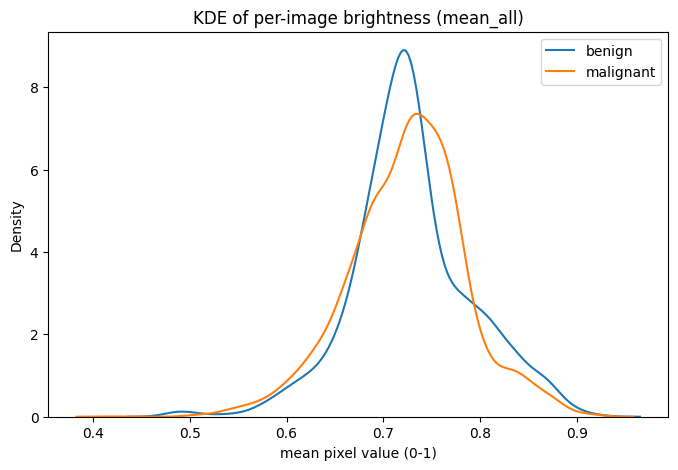

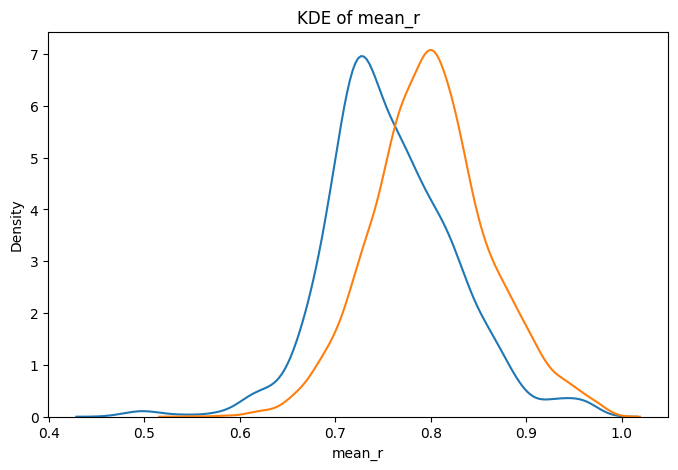

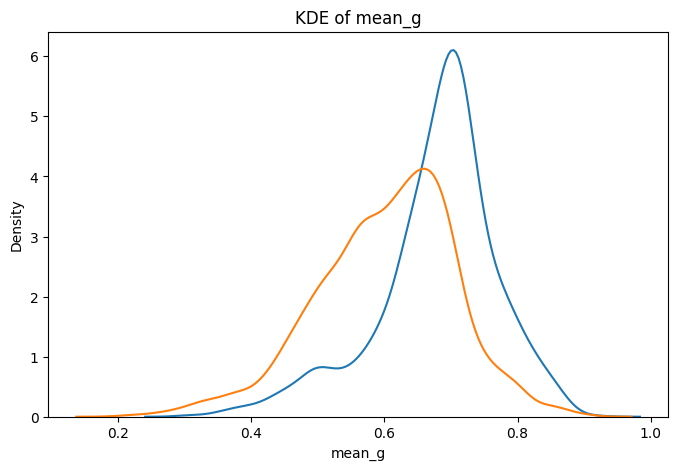

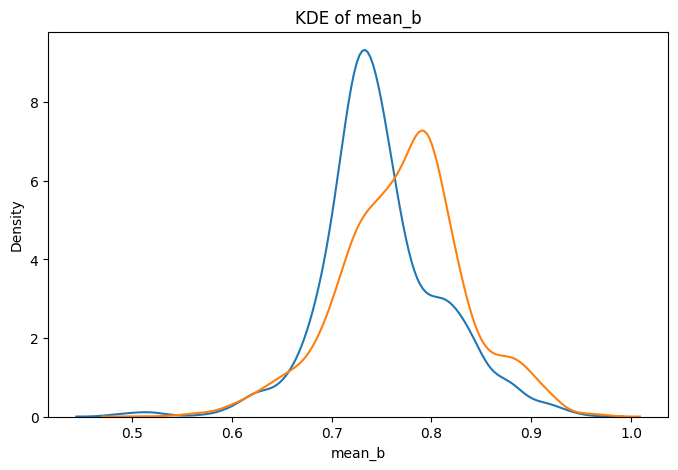


Saved KDE plots to: /content/drive/MyDrive/breakhis_stats

Sample paths (benign): ['/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-003.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-008.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-012.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-002.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-19854C/100X/SOB_B_TA-14-19854C-100-011.png', '/content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-1

In [ ]:
ben = stats_df[stats_df['label']=='benign']['mean_all'].values
mal = stats_df[stats_df['label']=='malignant']['mean_all'].values
t_stat, p_val = ttest_ind(ben, mal, equal_var=False)
ks_stat, ks_p = ks_2samp(ben, mal)
print(f"\nT-test on brightness means: t={t_stat:.4f}, p={p_val:.4e}")
print(f"KS-test on brightness distributions: ks={ks_stat:.4f}, p={ks_p:.4e}")

plt.figure(figsize=(8,5))
sns.kdeplot(ben, label='benign', bw_adjust=1)
sns.kdeplot(mal, label='malignant', bw_adjust=1)
plt.legend(); plt.title('KDE of per-image brightness (mean_all)')
plt.xlabel('mean pixel value (0-1)')
plt.savefig(os.path.join(out_dir,'kde_mean_all.png'))
plt.show()

for ch, col in [('mean_r','r'), ('mean_g','g'), ('mean_b','b')]:
    plt.figure(figsize=(8,5))
    sns.kdeplot(stats_df[stats_df['label']=='benign'][ch], label='benign')
    sns.kdeplot(stats_df[stats_df['label']=='malignant'][ch], label='malignant')
    plt.title(f'KDE of {ch}')
    plt.savefig(os.path.join(out_dir,f'kde_{ch}.png'))
    plt.show()

print("\nSaved KDE plots to:", out_dir)
print("\nSample paths (benign):", sample_paths['benign'])
print("Sample paths (malignant):", sample_paths['malignant'])

#First training on tiny 20-sample set to check the accuracy and other metrics

In [ ]:
import tensorflow as tf, numpy as np, random
SEED=42
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)
IMG_SIZE=(224,224); BATCH_SIZE=8

pos = df[df['label']=='malignant'].sample(10, random_state=SEED)
neg = df[df['label']=='benign'].sample(10, random_state=SEED)
small_df = pd.concat([pos, neg]).sample(frac=1, random_state=SEED).reset_index(drop=True)

def load_img(path,label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img,3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

paths = small_df['path'].values
labels = np.array([0 if l=='benign' else 1 for l in small_df['label']], dtype=np.int32)
ds = tf.data.Dataset.from_tensor_slices((paths, labels))
ds = ds.map(lambda p,l: load_img(p,l), num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

inputs = tf.keras.Input(shape=IMG_SIZE+(3,))
x = tf.keras.layers.Rescaling(1./1)(inputs)
x = tf.keras.layers.Conv2D(32,3,activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(64,3,activation='relu', padding='same')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(2, activation='softmax')(x)
mini = tf.keras.Model(inputs,out)
mini.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = mini.fit(ds, epochs=40, verbose=2)
imgs, labs = next(iter(ds))
preds = mini.predict(imgs)
import numpy as np
print("Batch truths:", labs.numpy())
print("Batch preds:", np.argmax(preds, axis=1))
from sklearn.metrics import classification_report
all_imgs = []
for p in paths:
    img = tf.io.read_file(p)
    img = tf.image.decode_png(img,3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    all_imgs.append(img)
all_imgs = tf.stack(all_imgs, axis=0)
preds_all = mini.predict(all_imgs)
y_pred = np.argmax(preds_all, axis=1)
print(classification_report(labels, y_pred, target_names=['benign','malignant']))

Epoch 1/40
3/3 - 6s - 2s/step - accuracy: 0.5000 - loss: 0.6948
Epoch 2/40
3/3 - 0s - 55ms/step - accuracy: 0.6000 - loss: 0.6811
Epoch 3/40
3/3 - 0s - 55ms/step - accuracy: 0.8000 - loss: 0.6742
Epoch 4/40
3/3 - 0s - 55ms/step - accuracy: 0.9000 - loss: 0.6664
Epoch 5/40
3/3 - 0s - 57ms/step - accuracy: 0.8500 - loss: 0.6567
Epoch 6/40
3/3 - 0s - 59ms/step - accuracy: 0.9000 - loss: 0.6455
Epoch 7/40
3/3 - 0s - 55ms/step - accuracy: 0.9500 - loss: 0.6320
Epoch 8/40
3/3 - 0s - 101ms/step - accuracy: 0.8500 - loss: 0.6158
Epoch 9/40
3/3 - 0s - 56ms/step - accuracy: 0.9000 - loss: 0.5966
Epoch 10/40
3/3 - 0s - 57ms/step - accuracy: 0.9000 - loss: 0.5763
Epoch 11/40
3/3 - 0s - 61ms/step - accuracy: 0.9000 - loss: 0.5511
Epoch 12/40
3/3 - 0s - 55ms/step - accuracy: 0.9000 - loss: 0.5235
Epoch 13/40
3/3 - 0s - 58ms/step - accuracy: 0.9000 - loss: 0.4923
Epoch 14/40
3/3 - 0s - 96ms/step - accuracy: 0.9000 - loss: 0.4639
Epoch 15/40
3/3 - 0s - 100ms/step - accuracy: 0.9000 - loss: 0.4309
Epoc

In [ ]:
import tensorflow as tf, numpy as np, random, matplotlib.pyplot as plt
from sklearn.metrics import classification_report
SEED = 42
tf.random.set_seed(SEED); np.random.seed(SEED); random.seed(SEED)

IMG_SIZE=(224,224)
BATCH_SIZE=8

pos = df[df['label']=='malignant'].sample(10, random_state=SEED)
neg = df[df['label']=='benign'].sample(10, random_state=SEED)
small_df = pd.concat([pos, neg]).reset_index(drop=True)

def load_img(path,label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img,3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

paths = small_df['path'].values
labels = np.array([0 if l=='benign' else 1 for l in small_df['label']], dtype=np.int32)

ds = tf.data.Dataset.from_tensor_slices((paths, labels))
ds = ds.map(lambda p,l: load_img(p,l), num_parallel_calls=tf.data.AUTOTUNE)
ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

inputs = tf.keras.Input(shape=IMG_SIZE+(3,))
x = tf.keras.layers.Rescaling(1./1)(inputs)
x = tf.keras.layers.Conv2D(64,3,activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(128,3,activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128,3,activation='relu', padding='same')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(2, activation='softmax')(x)
ovf_model = tf.keras.Model(inputs,out)

ovf_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = ovf_model.fit(ds, epochs=200, verbose=0)

loss, acc = ovf_model.evaluate(ds, verbose=0)
print("FINAL TRAIN LOSS:", loss, " ACC:", acc)

all_imgs = []
for p in paths:
    img = tf.io.read_file(p)
    img = tf.image.decode_png(img,3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    all_imgs.append(img)
all_imgs = tf.stack(all_imgs, axis=0)

preds_all = ovf_model.predict(all_imgs, verbose=0)
y_pred = np.argmax(preds_all, axis=1)

print("\nClassification report on overfit set:")
print(classification_report(labels, y_pred, target_names=['benign','malignant']))

mis_idx = [i for i,(t,p) in enumerate(zip(labels, y_pred)) if t!=p]
print("Misclassified indices:", mis_idx)


n_show = min(8, len(mis_idx))
for i in range(n_show):
    idx = mis_idx[i]
    p = paths[idx]
    img = tf.io.read_file(p)
    img = tf.image.decode_png(img,3)
    img = tf.image.resize(img, IMG_SIZE)
    plt.figure(figsize=(3,3))
    plt.imshow(img.numpy())
    plt.title(f"Idx:{idx} True:{['benign','malignant'][labels[idx]]} Pred:{['benign','malignant'][y_pred[idx]]}")
    plt.axis('off')
    plt.show()

FINAL TRAIN LOSS: 0.12306562811136246  ACC: 1.0

Classification report on overfit set:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00        10
   malignant       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Misclassified indices: []


INDEX: 8 PATH: /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/100X/SOB_M_DC-14-10926-100-003.png TRUE LABEL: malignant
 raw dtype: <dtype: 'uint8'>  shape: (460, 700, 3)  min,max: 30 255


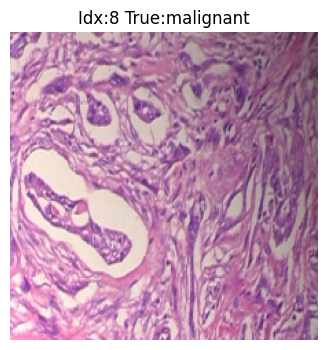

INDEX: 9 PATH: /content/BreaKHis/BreaKHis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-19440/200X/SOB_M_PC-14-19440-200-007.png TRUE LABEL: malignant
 raw dtype: <dtype: 'uint8'>  shape: (460, 700, 3)  min,max: 88 250


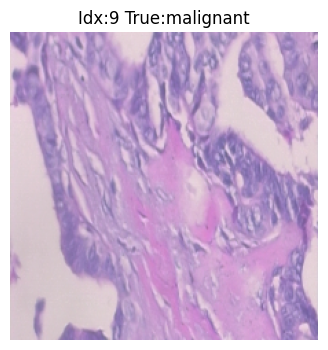

In [ ]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt, pandas as pd
mis_idx = [8,9]
SEED=42
pos = df[df['label']=='malignant'].sample(10, random_state=SEED)
neg = df[df['label']=='benign'].sample(10, random_state=SEED)
small_df = pd.concat([pos, neg]).reset_index(drop=True)
paths = small_df['path'].values
labels = np.array([0 if l=='benign' else 1 for l in small_df['label']], dtype=np.int32)

for idx in mis_idx:
    p = paths[idx]
    lab = labels[idx]
    print("INDEX:", idx, "PATH:", p, "TRUE LABEL:", ['benign','malignant'][lab])
    img = tf.io.read_file(p)
    img = tf.image.decode_png(img, channels=3)
    print(" raw dtype:", img.dtype, " shape:", img.shape, " min,max:", int(tf.reduce_min(img).numpy()), int(tf.reduce_max(img).numpy()))
    img_res = tf.image.resize(img, (224,224))
    img_float = tf.cast(img_res, tf.float32) / 255.0
    plt.figure(figsize=(4,4)); plt.imshow(img_float.numpy()); plt.title(f"Idx:{idx} True:{['benign','malignant'][lab]}"); plt.axis('off'); plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

print("DF size:", len(df))
print(df['label'].value_counts())

y = df['label']

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=SEED)
for train_idx, temp_idx in sss1.split(df, y):
    train_df = df.iloc[train_idx].reset_index(drop=True)
    temp_df  = df.iloc[temp_idx].reset_index(drop=True)

sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.50, random_state=SEED)
for val_idx, test_idx in sss2.split(temp_df, temp_df['label']):
    val_df  = temp_df.iloc[val_idx].reset_index(drop=True)
    test_df = temp_df.iloc[test_idx].reset_index(drop=True)

print("\nBefore balancing:")
print("Train:", train_df['label'].value_counts())
print("Val:", val_df['label'].value_counts())
print("Test:", test_df['label'].value_counts())

ben = train_df[train_df['label']=="benign"]
mal = train_df[train_df['label']=="malignant"]

upsampled_ben = ben.sample(len(mal), replace=True, random_state=SEED)
balanced_train_df = pd.concat([mal, upsampled_ben]).sample(frac=1, random_state=SEED).reset_index(drop=True)

print("\nAFTER balancing:")
print(balanced_train_df['label'].value_counts())

DF size: 7909
label
malignant    5429
benign       2480
Name: count, dtype: int64

Before balancing:
Train: label
malignant    3800
benign       1736
Name: count, dtype: int64
Val: label
malignant    814
benign       372
Name: count, dtype: int64
Test: label
malignant    815
benign       372
Name: count, dtype: int64

AFTER balancing:
label
benign       3800
malignant    3800
Name: count, dtype: int64


In [ ]:
import tensorflow as tf, numpy as np, os
SEED = 42
tf.random.set_seed(SEED); np.random.seed(SEED)
IMG_SIZE=(224,224); BATCH_SIZE=32; AUTOTUNE = tf.data.AUTOTUNE
label_to_index = {'benign':0,'malignant':1}

def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    img = tf.keras.applications.efficientnet_v2.preprocess_input(img)
    return img, label

augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.06),
    tf.keras.layers.RandomZoom(0.04)
])

def df_to_ds_pre(df, shuffle=True, augment_data=False):
    paths = df['path'].values
    labels = np.array([label_to_index[l] for l in df['label'].values], dtype=np.int32)
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(paths), seed=SEED)
    ds = ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
    if augment_data:
        ds = ds.map(lambda x,y:(augment(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

train_ds = df_to_ds_pre(balanced_train_df, shuffle=True, augment_data=True)
val_ds = df_to_ds_pre(val_df, shuffle=False, augment_data=False)
test_ds = df_to_ds_pre(test_df, shuffle=False, augment_data=False)
for imgs, labs in train_ds.take(1):
    print("train batch counts:", np.bincount(labs.numpy()))
for imgs, labs in val_ds.take(1):
    print("val batch counts:", np.bincount(labs.numpy()))

train batch counts: [15 17]
val batch counts: [10 22]


In [ ]:
import tensorflow as tf
base = tf.keras.applications.EfficientNetV2B1(include_top=False, weights='imagenet', input_shape=IMG_SIZE+(3,))
base.trainable = False
inputs = tf.keras.Input(shape=IMG_SIZE+(3,))
x = base(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.35)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
opt = tf.keras.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-5)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

28456008/28456008 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b1 (Functional)  │ (None, 7, 7, 1280)     │     6,931,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,595,190 (28.97 MB)

 Trainable params: 660,482 (2.52 MB)

 Non-trainable params: 6,934,708 (26.45 MB)

#FINAL TRAINING ON THE ENTIRE SET

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]
history_head = model.fit(train_ds, validation_data=val_ds, epochs=12, callbacks=callbacks)

Epoch 1/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 216s 741ms/step - accuracy: 0.6991 - loss: 0.7245 - val_accuracy: 0.8499 - val_loss: 0.3663 - learning_rate: 1.0000e-04
Epoch 2/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 136s 570ms/step - accuracy: 0.8084 - loss: 0.4762 - val_accuracy: 0.8921 - val_loss: 0.2858 - learning_rate: 1.0000e-04
Epoch 3/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 137s 576ms/step - accuracy: 0.8322 - loss: 0.3981 - val_accuracy: 0.9005 - val_loss: 0.2612 - learning_rate: 1.0000e-04
Epoch 4/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 140s 569ms/step - accuracy: 0.8450 - loss: 0.3876 - val_accuracy: 0.8971 - val_loss: 0.2607 - learning_rate: 1.0000e-04
Epoch 5/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 137s 574ms/step - accuracy: 0.8522 - loss: 0.3466 - val_accuracy: 0.9064 - val_loss: 0.2394 - learning_rate: 1.0000e-04
Epoch 6/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 136s 571ms/step - accuracy: 0.8586 - loss: 0.3405 - val_accuracy: 0.9106 - val_loss: 0.2402 - learning_rate: 1.0000e-04
Epoch 7/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
base.trainable = True
for layer in base.layers[:-80]:
    layer.trainable = False
opt2 = tf.keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=1e-6)
model.compile(optimizer=opt2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ft = model.fit(train_ds, validation_data=val_ds, epochs=12, callbacks=callbacks)

y_true=[]; y_pred=[]
for imgs, labs in test_ds:
    preds = model.predict(imgs)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labs.numpy())
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=['benign','malignant']))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

save_path = '/content/drive/MyDrive/breakhis_efficientnetv2b1_final.keras'
model.save(save_path)
print("Model saved to:", save_path)

Epoch 1/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 223s 728ms/step - accuracy: 0.7861 - loss: 0.4773 - val_accuracy: 0.8659 - val_loss: 0.3041 - learning_rate: 1.0000e-05
Epoch 2/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 144s 594ms/step - accuracy: 0.8276 - loss: 0.4044 - val_accuracy: 0.8887 - val_loss: 0.2671 - learning_rate: 1.0000e-05
Epoch 3/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 139s 584ms/step - accuracy: 0.8434 - loss: 0.3779 - val_accuracy: 0.8921 - val_loss: 0.2604 - learning_rate: 1.0000e-05
Epoch 4/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 140s 588ms/step - accuracy: 0.8544 - loss: 0.3488 - val_accuracy: 0.8988 - val_loss: 0.2451 - learning_rate: 1.0000e-05
Epoch 5/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 140s 588ms/step - accuracy: 0.8561 - loss: 0.3467 - val_accuracy: 0.9098 - val_loss: 0.2244 - learning_rate: 1.0000e-05
Epoch 6/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 139s 584ms/step - accuracy: 0.8662 - loss: 0.3330 - val_accuracy: 0.9081 - val_loss: 0.2267 - learning_rate: 1.0000e-05
Epoch 7/12
238/238 ━━━━━━━━━━━━━━━━━━━━ 

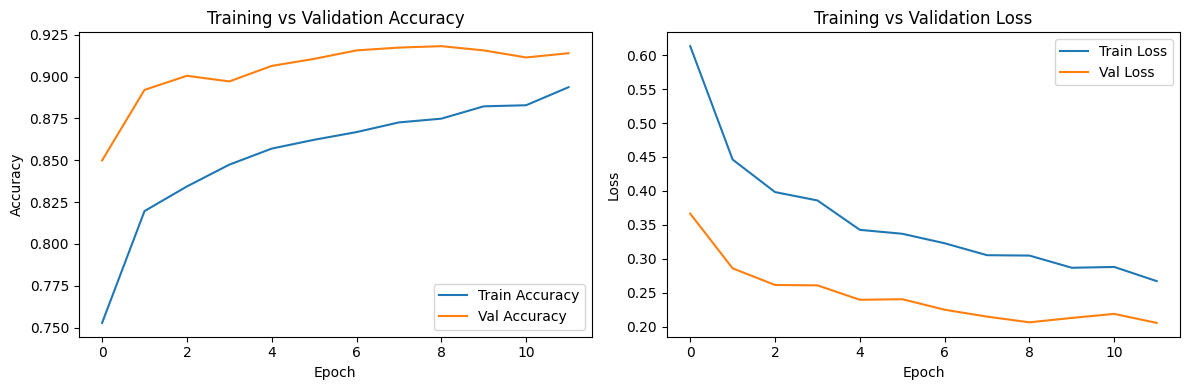

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_head.history['accuracy'], label='Train Accuracy')
plt.plot(history_head.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_head.history['loss'], label='Train Loss')
plt.plot(history_head.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

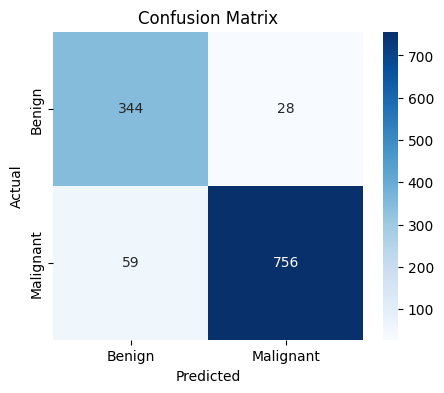

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)

    inp = tf.expand_dims(img, axis=0)

    preds = model.predict(inp)[0]
    class_idx = np.argmax(preds)
    confidence = preds[class_idx]

    label_map = {0:'Benign', 1:'Malignant'}

    plt.imshow(img.numpy().astype('uint8'))
    plt.title(f"Prediction: {label_map[class_idx]} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    return label_map[class_idx], confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


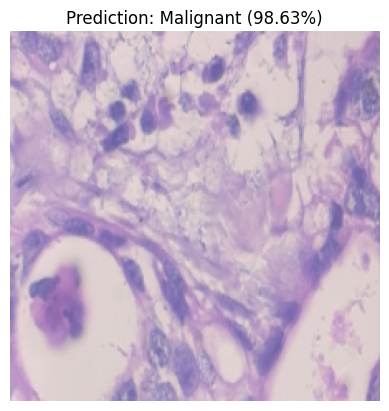

Predicted: Malignant Confidence: 0.98633826


In [ ]:
sample_path = test_df['path'].sample(1, random_state=42).values[0]
pred, conf = predict_image(sample_path)
print("Predicted:", pred, "Confidence:", conf)